In [1]:
%pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt

In [23]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata('data.sfgov.org', None)

# Get all results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get('5cei-gny5', limit=50000)

columns_to_remove = [
    ':@computed_region_6qbp_sg9q', ':@computed_region_qgnn_b9vv', ':@computed_region_26cr_cadq',
    ':@computed_region_ajp5_b2md', ':@computed_region_fyvs_ahh9', ':@computed_region_p5aj_wyqh',
    ':@computed_region_rxqg_mtj9', ':@computed_region_yftq_j783', ':@computed_region_bh8s_q3mv',
    ':@computed_region_6pnf_4xz7', ':@computed_region_jwn9_ihcz', ':@computed_region_pigm_ib2e',
    ':@computed_region_9jxd_iqea', ':@computed_region_6ezc_tdp2', ':@computed_region_h4ep_8xdi'
]

# Convert to pandas DataFrame
ev_df = pd.DataFrame.from_records(results).drop(columns=columns_to_remove)

# Convert file_date to datetime
ev_df['file_date'] = pd.to_datetime(ev_df['file_date'])

ev_df['eviction_type'] = ev_df.iloc[:, 6:25].apply(lambda x: ', '.join(x.index[x]), axis=1)

<Axes: title={'center': 'Evictions by Year'}, xlabel='file_date', ylabel='Number of Evictions'>

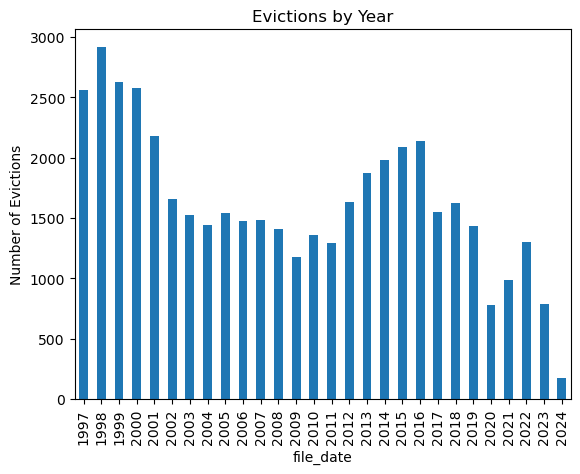

In [24]:
# Plot overall evictions by year
plt.title('Evictions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Evictions')
ev_df['file_date'].dt.year.value_counts().sort_index().plot(kind='bar')

<Axes: title={'center': 'Evictions by Month'}, xlabel='file_date', ylabel='Number of Evictions'>

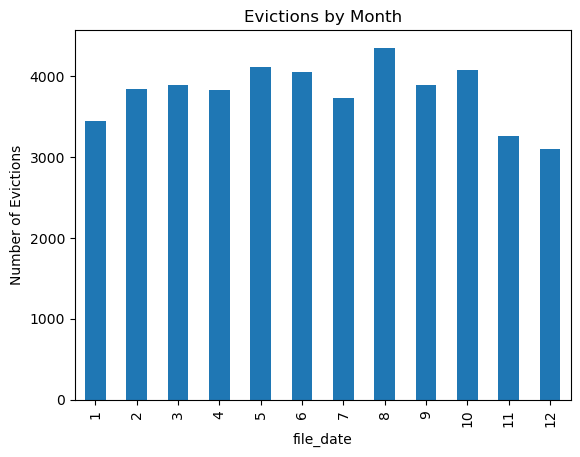

In [25]:
# Plot overall evictions by month
plt.figure()
plt.title('Evictions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Evictions')
ev_df['file_date'].dt.month.value_counts().sort_index().plot(kind='bar')

<Axes: title={'center': 'Evictions by Day of Week'}, xlabel='file_date', ylabel='Number of Evictions'>

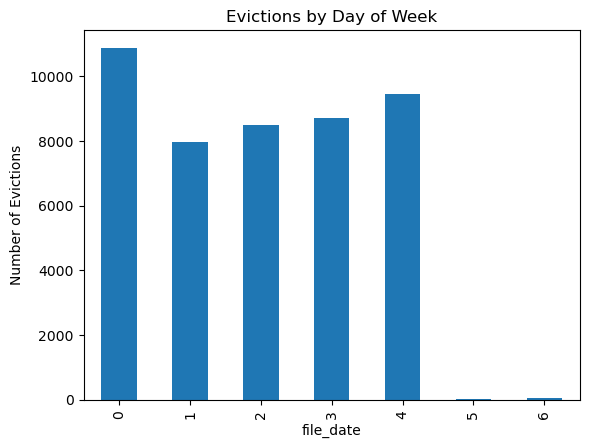

In [26]:
# Plot overall evictions by day of week
plt.figure()
plt.title('Evictions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Evictions')
ev_df['file_date'].dt.dayofweek.value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='file_date'>

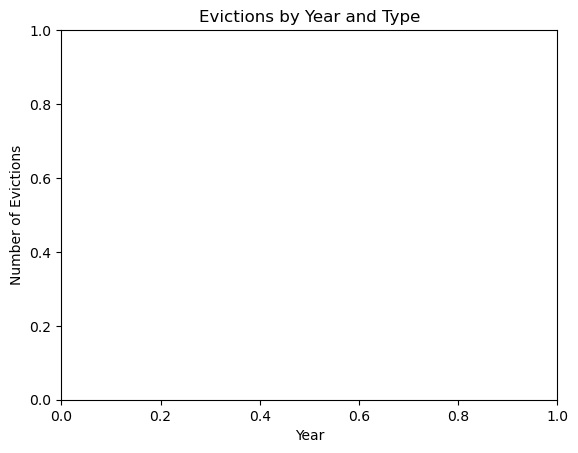

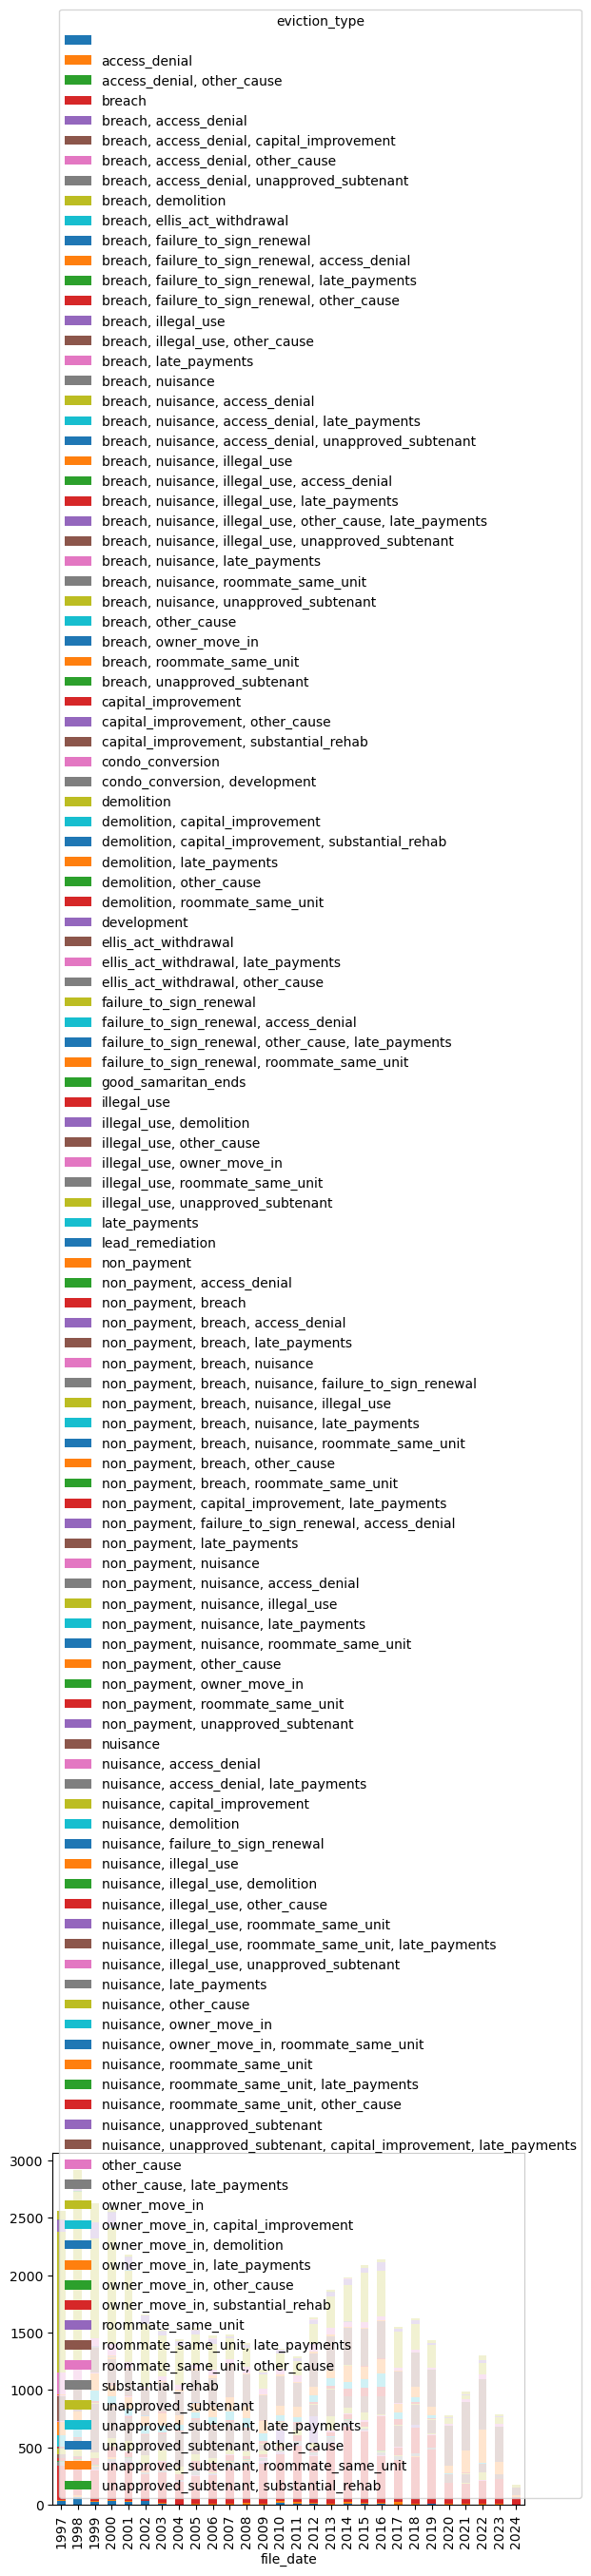

In [27]:
# Plot evictions over year by type
plt.figure()
plt.title('Evictions by Year and Type')
plt.xlabel('Year')
plt.ylabel('Number of Evictions')
ev_df.groupby([ev_df['file_date'].dt.year, 'eviction_type']).size().unstack().plot(kind='bar', stacked=True)